In [1]:
library(keras)
library(rutil)
mnist <- dataset_mnist()
x_train <- mnist$train$x


In [10]:
options(repr.plot.width=4, repr.plot.height=3)

In [12]:
im <- t(apply(x_train[1,,], 2, rev))
im[im > 0] <- 1
im[im == 0] <- -1

m <- mean(im)
im2 <- (im > m) + -1 * (im < m)
noisy.im <- im2 + matrix(runif(28*28), 28, 28)

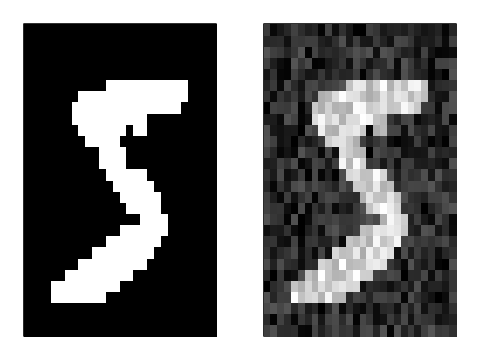

In [25]:
par(mar=c(1, 1, 1, 1), xaxs='i', yaxs='i', mfrow=c(1, 2))
image(1:28, 1:28, im, col=gray((0:255)/255), xaxt='n', yaxt="n")
image(1:28, 1:28, noisy.im, col=gray((0:255)/255), xaxt='n', yaxt="n")

In [147]:
 sigmoid <- function(x) 1 / (1+exp(-x))

In [205]:
N <- nrow(noisy.im)
M <- ncol(noisy.im)
J <- .1

In [206]:
neg.norm <- log(dnorm(as.vector(noisy.im), -1, 1))
pos.norm <- log(dnorm(as.vector(noisy.im), 1, 1))

In [207]:
local.evidence <- matrix(c(neg.norm, pos.norm), ncol=2)

In [208]:
most.likely <- apply(local.evidence, 1, which.max)

In [215]:
X <- matrix(1, N, M)
X[most.likely == 1] <- -1

set.seed(23)
for (i in seq(100)) 
{
  for (ix in seq(N)) 
  {
    for (iy in seq(M)) 
    {
      pos <- iy + M * (ix - 1)
      neighbors <- pos + c(-1, 1, -M, M)
      if (iy == 1) neighbors <- neighbors[!neighbors %in% (pos - 1)]
      if (iy == N) neighbors <- neighbors[!neighbors %in% (pos + 1)]
      if (ix == 1) neighbors <- neighbors[!neighbors %in% (pos - M)]
      if (ix == M) neighbors <- neighbors[!neighbors %in% (pos + M)]
      edge.potential <- 2 * J * X[pos] * sum(X[neighbors])
      node.potential <- local.evidence[pos, 2] - local.evidence[pos, 1]
      p  <- sigmoid(edge.potential - node.potential) 
      X[pos] <- ifelse(p >= .5, -1, 1)
    }
  }  
}

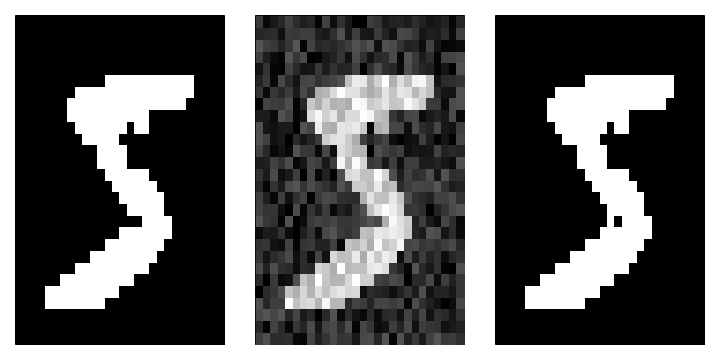

In [216]:
options(repr.plot.width=6, repr.plot.height=3)
par(mar=c(1, 1, 1, 1), xaxs='i', yaxs='i', mfrow=c(1, 3))
image(1:28, 1:28, im, col=gray((0:255)/255), xaxt='n', yaxt="n")
image(1:28, 1:28, noisy.im, col=gray((0:255)/255), xaxt='n', yaxt="n")
image(1:28, 1:28, X, col=gray((0:255)/255), xaxt='n', yaxt="n")